<a href="https://colab.research.google.com/github/hafsana271/DataScienceAssignmnt/blob/main/case_study_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
d=pd.read_csv('/content/Wholesale customers data.csv')    #Importing the dataset
d=d.drop('Channel',axis=1)

df=pd.DataFrame(d)
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [ ]:
df.isna().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


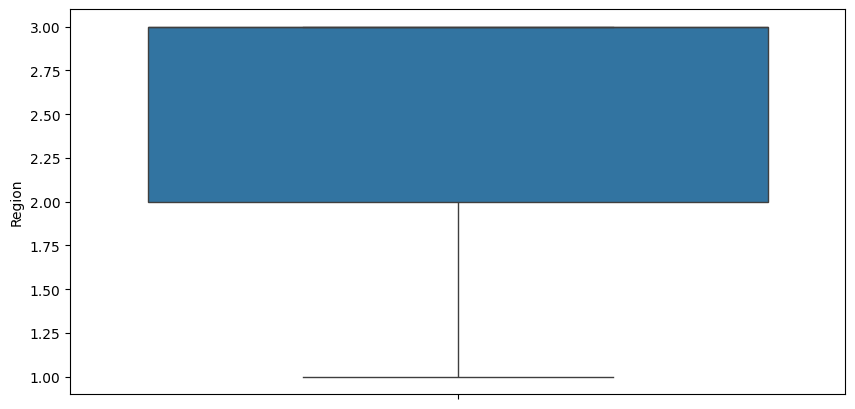

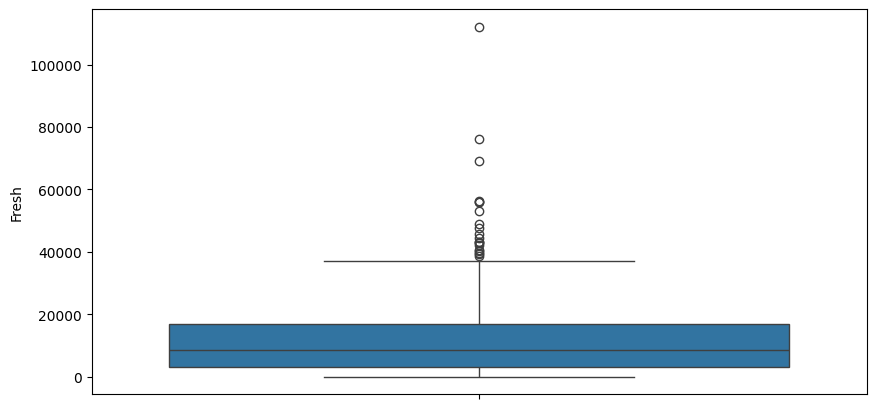

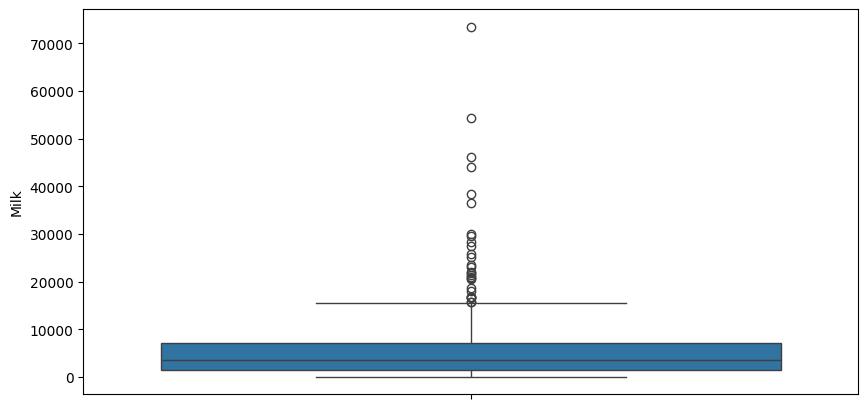

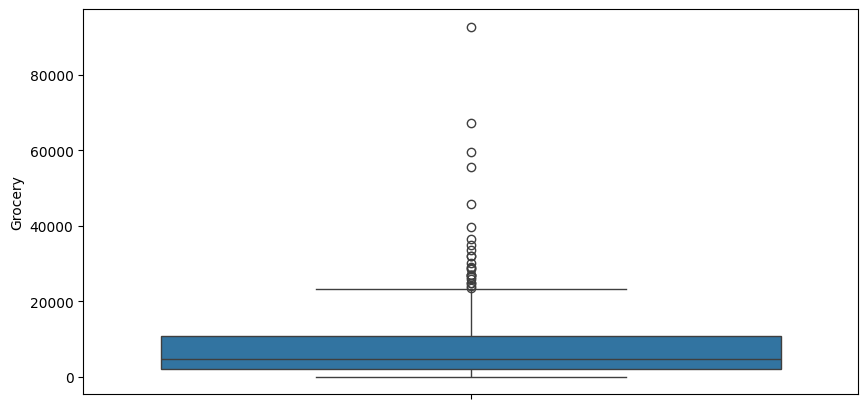

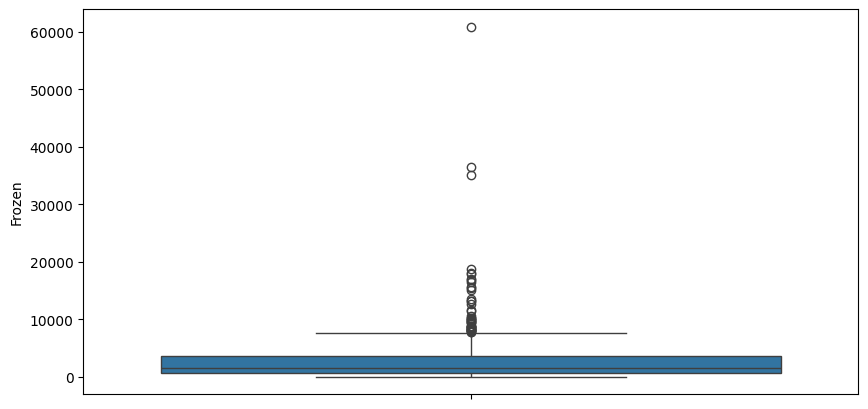

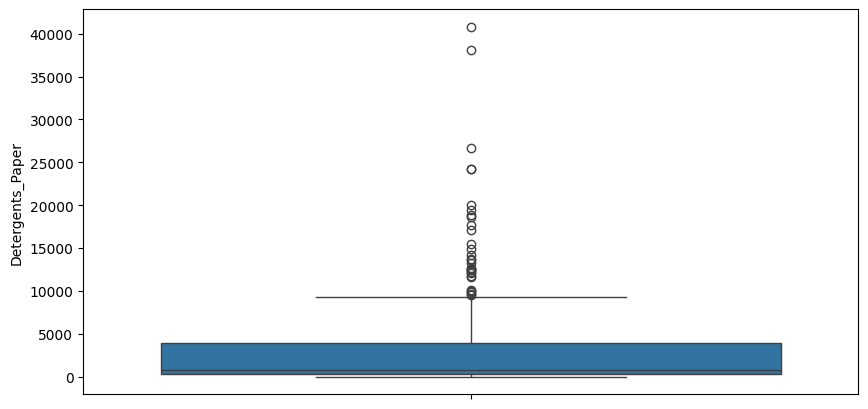

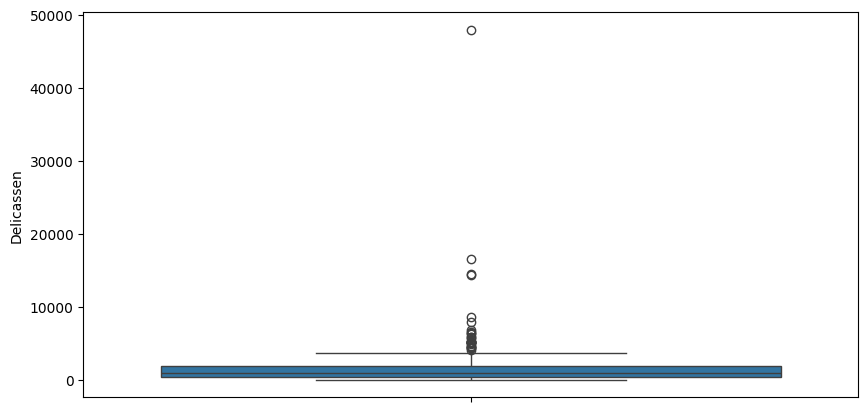

In [ ]:
for col in df.columns:             #Plotting boxplot to find outliers
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()


In [ ]:
outlier_col=[]
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]               #Finding total number of outliers in each column

    if count>0:
        outlier_col.append(column)        #printing the outlier columns
print(outlier_col)

Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27
['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [ ]:
for column in outlier_col:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)       #clipping outliers

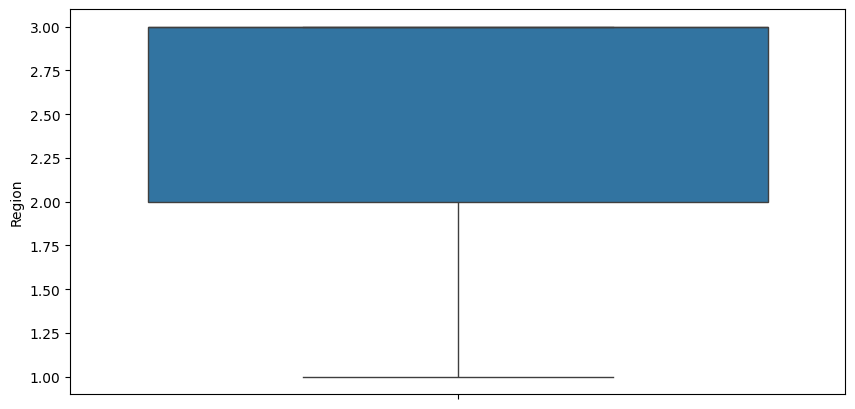

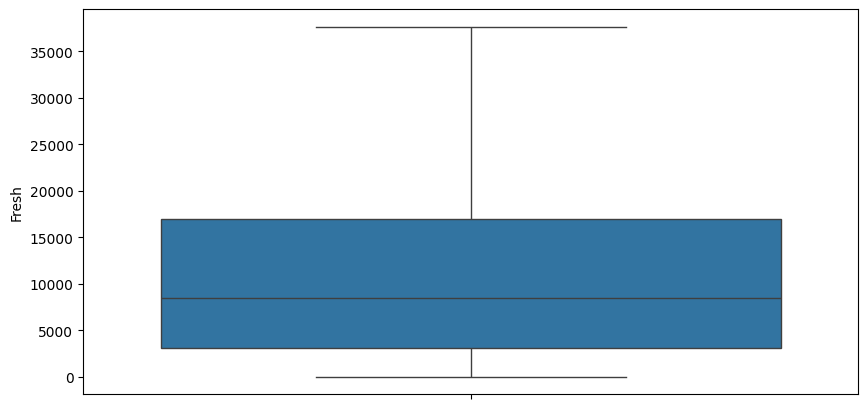

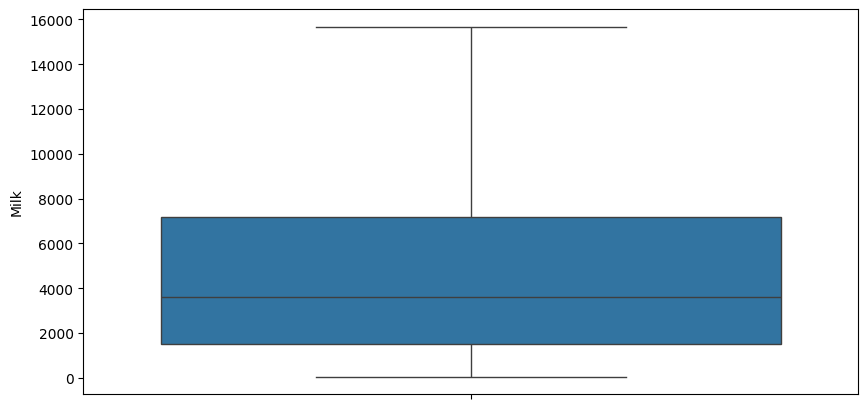

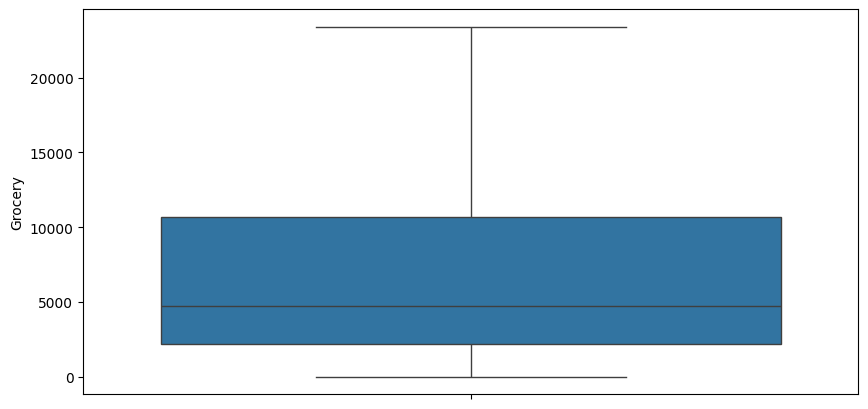

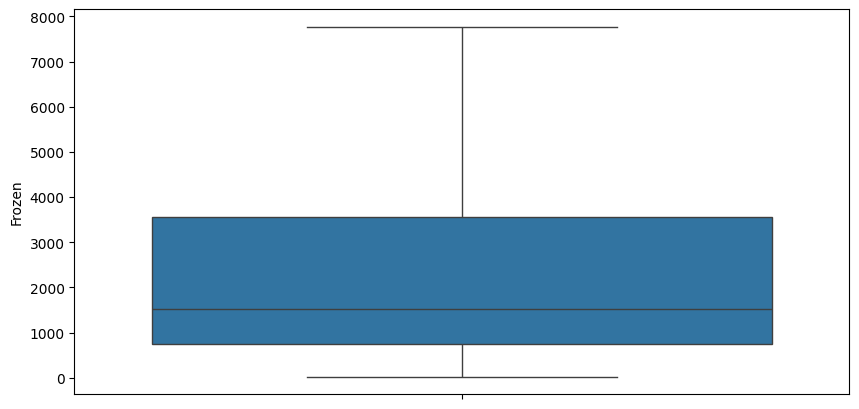

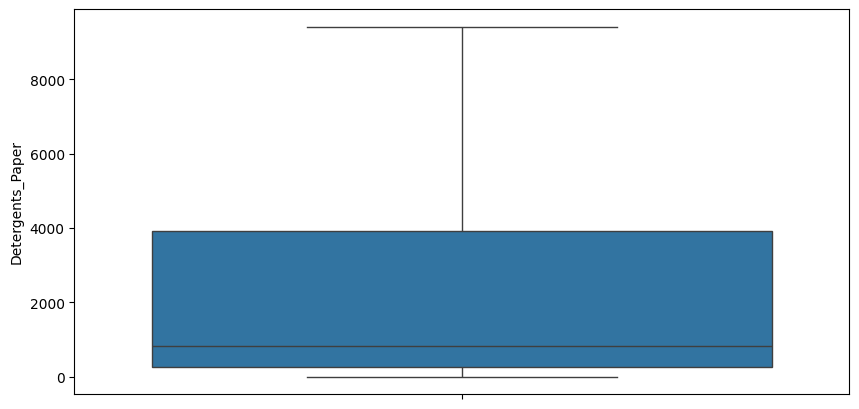

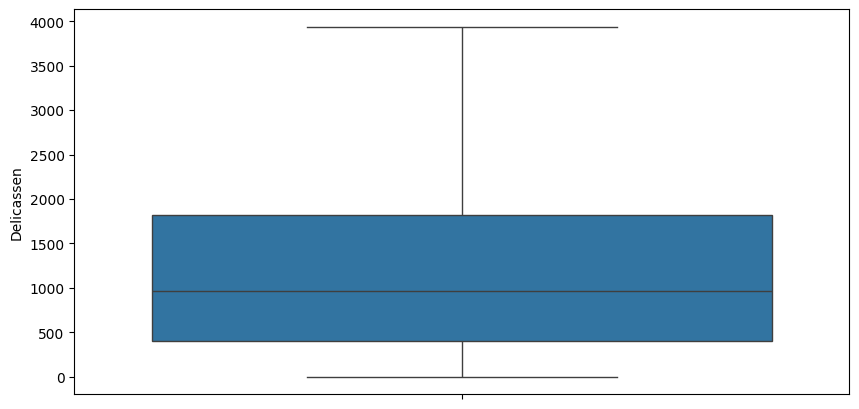

In [ ]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler             #Scaling the data
scalar=StandardScaler()
scaled_data=scalar.fit_transform(df)
scaled_data=pd.DataFrame(scaled_data,columns=df.columns)
scaled_data

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...,...
435,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
pred_cluster=kmeans.predict(scaled_data)
pred_cluster

array([0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,init="k-means++",max_iter=300,n_init=10)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

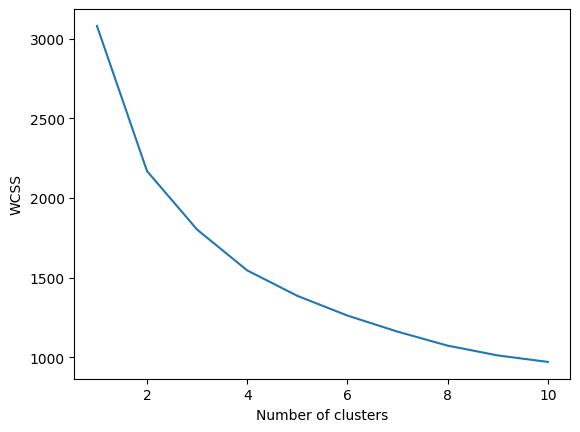

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal cluster : 2

In [ ]:
#Agglometrive Clustering

from sklearn.cluster import AgglomerativeClustering

agglo_cluster=AgglomerativeClustering(affinity='euclidean',linkage='ward')
y_agglo=agglo_cluster.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_agglo

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

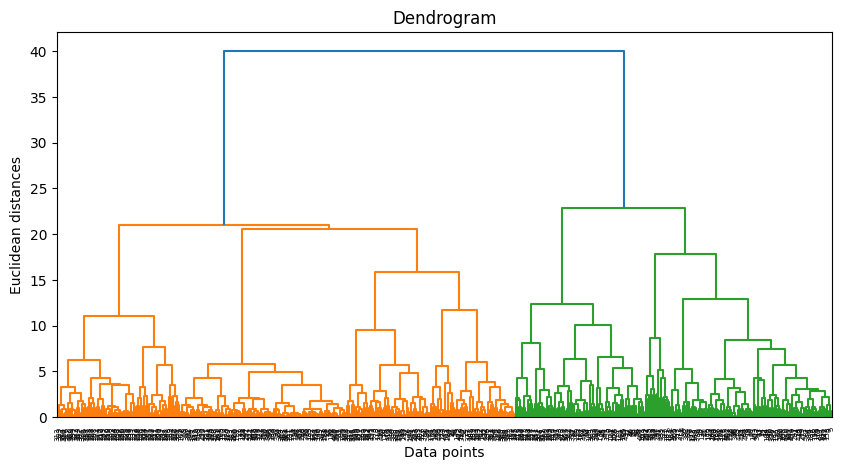

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

z=linkage(scaled_data,'ward')

plt.figure(figsize=(10,5))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')

plt.show()


Optimal cluster : 2

In [ ]:
.